### Włączamy obsługę GPU
  Na pasku narzędzi: *Runtime > Change Runtime Type*
  ustawiamy  *Hardware Accelerator* na GPU.
  Tutaj akurat trenujemy niewielką sieć, ale warto pamiętać o  tym ustawieniu jeśli zamierzamy trenować duże sieci.
  

### Importujemy niezbędne biblioteki

Importujemy bibliotekę Tensorflow ale, żeby nie używać pełnej nazwy, która jest za długa do częstego wpisywania, będziemy używali nazwy tf

In [1]:
import tensorflow as tf #biblioteka do uczenia sieci
import matplotlib.pyplot as plt # biblioteka do wizualizacji przykładów

#biblioteki do ładnego wyświetlenia tablicy
from pprint import pprint
import numpy as np
large_width = 400
np.set_printoptions(linewidth=large_width)

### Ładujemy dane
Szczęśliwie zbiór MNIST jest od razu dostępny jako przykładowy w bibliotece.  
x_train - obrazy treningowe  
y_train -etykiety obrazów treningowych  
x_test, y_test - analogicznie dla zbioru testowego

In [2]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

In [3]:
print("liczba obrazow treningowych", len(x_train), "liczba obrazow testowych", len(x_test))

liczba obrazow treningowych 60000 liczba obrazow testowych 10000


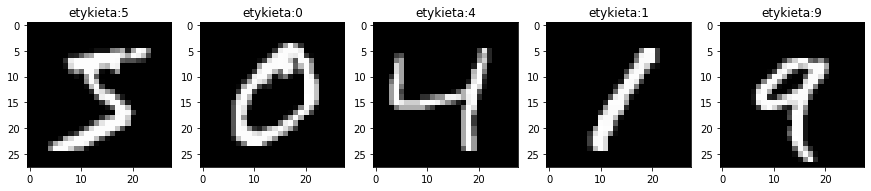

In [4]:
fig, ax=plt.subplots(1,5) #przygotowujemy miejsce na 5 obrazów w 1 wierszu
fig.set_figheight(15) #powiększamy rozmiar obrazu, żeby był bardziej czytelny
fig.set_figwidth(15)  #powiększamy rozmiar obrazu, żeby był bardziej czytelny
for i in range(5): #chcemy wyświetlić 5  pierwszych obrazów
  ax[i].imshow(x_train[i], cmap='gray') #wyświetlamy  i-ty obraz w skali szarości w i-tej kolumnie
  ax[i].set_title("etykieta:"+str(y_train[i])) #dodajemy podpis z etykietą klasy
  

In [5]:
pprint(x_train[0], width=800) #wyświetlamy reprezentację pierwszej cyfry w pamięci komputera


array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,  18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,  30,  36,  94, 154, 170, 253, 253, 253, 253, 253, 225, 172

In [6]:
#skalujemy dane wejściowe, aby miały zakres od 0 do 1
x_train = x_train / 255. 
x_test = x_test / 255.

In [7]:
# zmieniamy sposób zapisu etykiet na taki zrozumiały dla funkcji kosztu
y_test=tf.keras.utils.to_categorical(y_test)
y_train=tf.keras.utils.to_categorical(y_train)
print(y_train[0])

[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


## Budujemy model

Zbudujemy prosty model złożony z warstw w pełni połączonych.  
Architektura jest bardzo prosta i ma jedynie służyć do celów demonstracyjnych.  
W rzeczywistych zastosowaniach do rozpoznawania obrazów wykorzystuje się głównie sieci konwolucyjne (CNN).

In [8]:
model =tf.keras.models.Sequential() #rozpoczynamy budowę modelu, Sequential oznacza, że będziemy kolejno ("sekwencyjnie") dodawać nowe warstwy
model.add(tf.keras.layers.Flatten())  #warstwa, która skleja "wiersze" dwuwymiarowego obrazu, w jeden długi "wiersz", w ten sposób zamieniamy obraz na 1-wymiarowy wektor
model.add(tf.keras.layers.Dense(16, activation="relu")) #warstwa w pełni połączona o 128 neuronach

model.add(tf.keras.layers.Dense(10,activation="sigmoid")) #liczba neuronów w tej warstwie musi być równa liczbie klas!!!

### Uczymy model

Model celowo jest uczony przez zbyt dużą liczbę epok, aby pokazać, że więcej nie zawsze znaczy lepiej.

In [9]:
optimizer=tf.keras.optimizers.Adam(learning_rate=0.001) #wybieramy optymalizator (jeden z bardziej popularnych, alternatywą może być SGD) do uczenia, ustawiamy współczynnik uczenia na 0.001
model.compile(optimizer=optimizer, loss="categorical_crossentropy", metrics=["accuracy"]) #kompilujemy model i podajemy funkcję straty

history=model.fit(x=x_train,y=y_train,validation_data=(x_test,y_test),epochs=30,batch_size=64) #uczymy model podając mu 64 obrazy w jednej partii, cały zbiór przepuszczamy przez model 30 razy

Epoch 1/30
938/938 [==============================] - 3s 3ms/step - loss: 0.8134 - accuracy: 0.7704 - val_loss: 0.2877 - val_accuracy: 0.9195
Epoch 2/30
938/938 [==============================] - 3s 3ms/step - loss: 0.2856 - accuracy: 0.9181 - val_loss: 0.2504 - val_accuracy: 0.9267
Epoch 3/30
938/938 [==============================] - 3s 3ms/step - loss: 0.2498 - accuracy: 0.9282 - val_loss: 0.2250 - val_accuracy: 0.9343
Epoch 4/30
938/938 [==============================] - 3s 3ms/step - loss: 0.2271 - accuracy: 0.9351 - val_loss: 0.2142 - val_accuracy: 0.9368
Epoch 5/30
938/938 [==============================] - 3s 3ms/step - loss: 0.2088 - accuracy: 0.9387 - val_loss: 0.2085 - val_accuracy: 0.9379
Epoch 6/30
938/938 [==============================] - 3s 3ms/step - loss: 0.1902 - accuracy: 0.9451 - val_loss: 0.1941 - val_accuracy: 0.9437
Epoch 7/30
938/938 [==============================] - 3s 3ms/step - loss: 0.1834 - accuracy: 0.9471 - val_loss: 0.1877 - val_accuracy: 0.9446
Epoch 

Podgląd na strukturę modelu. Pozornie nieduża liczba neuronów wygenerowała ponad 12000 parametrów.

In [10]:
model.summary() # w kolumnie params znajduje się liczba parametrów czyli wag neuronów

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 16)                12560     
_________________________________________________________________
dense_1 (Dense)              (None, 10)                170       
Total params: 12,730
Trainable params: 12,730
Non-trainable params: 0
_________________________________________________________________


### Analizujemy wyniki modelu

Tu warto zwrócić uwagę, że od pewnego momentu wyniki modelu na zbiorze testowym się nie poprawiają, a nawet mogą się pogarszać. Jednocześnie wyniki na zbiorze treningowym cały czas się poprawiają. Może to świadczyć o przeuczeniu (ang. overfitting), czyli zjawisku w którym model "zapamiętuje" przykłady treningowe, a nie znajduje reguł pozwalających na radzenie sobie z nowymi przykładami. 

Funkcja straty (mniej=lepiej)

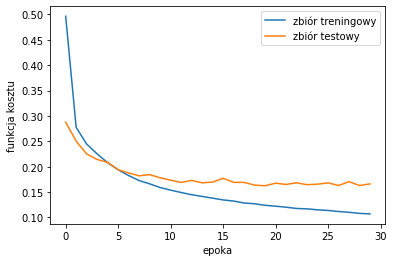

In [11]:
plt.plot(history.history["loss"])
plt.plot(history.history["val_loss"])
plt.xlabel("epoka")
plt.ylabel("funkcja kosztu")
plt.legend(["zbiór treningowy","zbiór testowy"])

Dokładność modelu (więcej=lepiej)

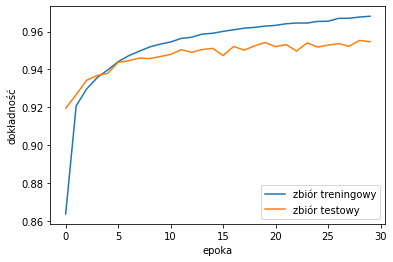

In [12]:
plt.plot(history.history["accuracy"])
plt.plot(history.history["val_accuracy"])
plt.xlabel("epoka")
plt.ylabel("dokładność")
plt.legend(["zbiór treningowy","zbiór testowy"])

Przykłady  błędnych klasyfikacji

In [13]:
predictions=model.predict(x_test) # przewidujemy klasy dla przykładów testowych
wrong_predictions = np.where((np.argmax(predictions,axis=1)!=np.argmax(y_test,axis=1)))[0] #znajdujemy indeksy błędnie sklasyfikowanych przykładów

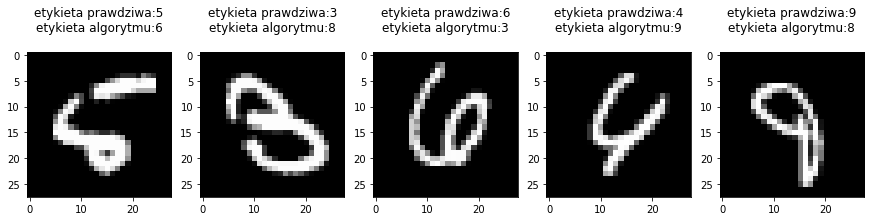

In [14]:
fig, ax=plt.subplots(1,5) #przygotowujemy miejsce na 5 obrazów w 1 wierszu
fig.set_figheight(15) #powiększamy rozmiar obrazu, żeby był bardziej czytelny
fig.set_figwidth(15)  #powiększamy rozmiar obrazu, żeby był bardziej czytelny
for i in range(5): #chcemy wyświetlić 5  pierwszych obrazów
  ax[i].imshow(x_test[wrong_predictions[i]], cmap='gray') #wyświetlamy  i-ty obraz w skali szarości w i-tej kolumnie
  ax[i].set_title("etykieta prawdziwa:"+
                  str(np.argmax(y_test[wrong_predictions[i]]))+"\n"
                  "etykieta algorytmu:"+
                  str(np.argmax(predictions[wrong_predictions[i]]))+"\n"
                  ) #dodajemy podpis z etykietą klas